# Распределение выборочного среднего случайной величины, распределённой по Лаплассу

Для начала импортируем необходимые библиотеки и модули:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Сгенерируем выборку размера $1000$ из распределения Лапласса с параметрами $\alpha\ =\ 1.0,\ \beta\ =\ 0.0$. Для этого воспользуемся методом ```laplace``` из модуля ```scipy.stats```:

In [2]:
loc, scale = 0.0, 1.0
X = sts.laplace()
sample = X.rvs(size=1000)

Построим гистограмму для сгенерировнной выборки (параметр ```normed``` заменен параметром ```density```):

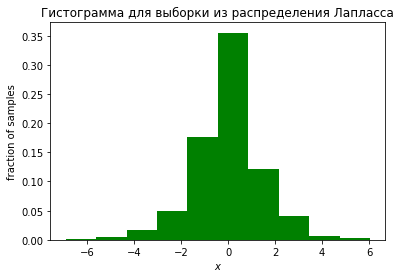

In [3]:
plt.hist(sample, density=True, color='green')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("Гистограмма для выборки из распределения Лапласса")
plt.show()

Для наглядности попробуем поменять число карманов гистограммы:

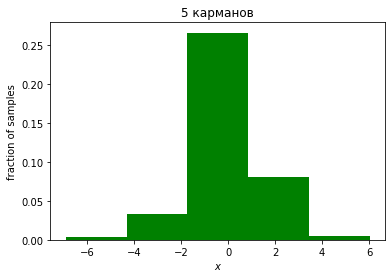

In [4]:
plt.hist(sample, density=True, bins=5, color='green')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("5 карманов")
plt.show()

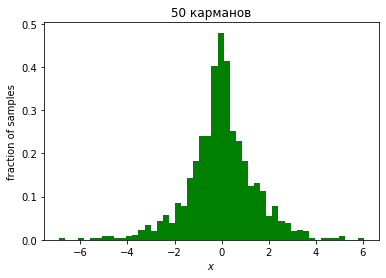

In [5]:
plt.hist(sample, density=True, bins=50, color='green')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("50 карманов")
plt.show()

Сравним полученную гистограмму с теоритической плотностью распределения Лапласса:

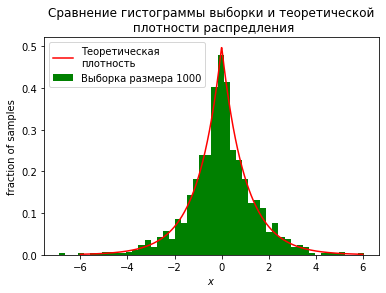

In [6]:
arr = np.linspace(-6, 6, 1000)
f = X.pdf(arr)
plt.plot(arr, f, label='Теоретическая\nплотность', color='red')
plt.hist(sample, density=True, bins=50, label='Выборка размера 1000', color='green')
plt.legend(loc='upper left')
plt.title("Сравнение гистограммы выборки и теоретической\n плотности распредления")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

Для каждого $n\ =\ 5,\ 10,\ 50$ сгенериурем $1000$ выборок размера $n$ и посчитаем выборочное среднее для каждой выборки (для подсчета выборочных средних будем пользоваться функцией ```numpy.mean()```:

In [40]:
sample = [[], [], []]
counter = 0
for n in [5, 10, 50]:
    for i in range(1000):
        temp = X.rvs(size=n)
        sample[counter].append(np.mean(temp))
    counter += 1

Посмотрим как распределены выборочные средние для каждого $n$:

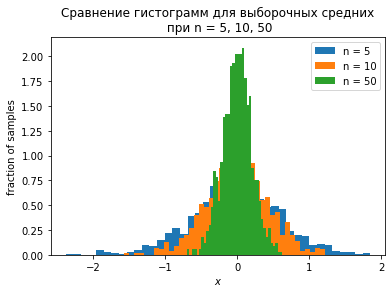

In [41]:
plt.hist(sample[0], density=True, bins=40, label='n = 5')
plt.hist(sample[1], density=True, bins=40, label='n = 10')
plt.hist(sample[2], density=True, bins=40, label='n = 50')
plt.legend()
plt.title("Сравнение гистограмм для выборочных средних\n при n = 5, 10, 50")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

Из построенных гистограмм видно, что с увеличением $n$ уменьшается размах гистограммы и увеличивается ее высота. Объяснение этого явлению вытекает из следующих рассуждений.

Согласно ЦПТ, выборочное среднее (с размером выборки $n\ =\ 5$) случайной величины $X$, распределенной по Лаплассу с параметрами $\alpha\ =\ 1$ и $\beta = 0$, стремится по распределению к нормальному с параметрами $$\mu\ =\ MX\ =\ \beta\ =\ 0,$$ $$\sigma^{2}\ =\ \frac{DX}{n}\ =\ \frac{2/\alpha^{2}}{5}\ =\ \frac{2}{5}$$
Аналогично получаем, что выборочное среднее для $n\ =\ 10$ аппроксимируется нормальным с $\mu\ =\ 0,\ \sigma^{2}\ =\ \frac{2}{10}$ и выборочное среднее для $n\ =\ 50$ аппроксимируется нормальным с $\mu\ =\ 0,\ \sigma^{2}\ =\ \frac{2}{50}$.

Из этих рассуждений видно, что с увеличением $n$ уменьшается мера разброса $\sigma^{2}$ аппроксимирующего нормального распределения, что и объясняет поведение гистограмм выше.

Сравним гистограмму для выборочного среднего при $n\ =\ 5$ и плотность аппроксимирующего его нормального распределения

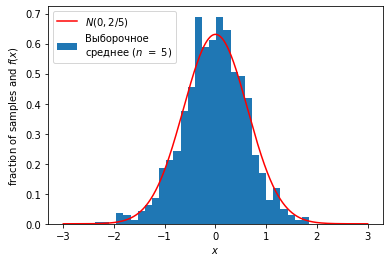

In [48]:
norm_1 = sts.norm(0, (0.4) ** (0.5))
arr_1 = np.linspace(-3, 3, 1000)
f_1 = norm_1.pdf(arr_1)
plt.plot(arr_1, f_1, label='$N(0, 2/5)$', color='red')
plt.hist(sample[0], density=True, bins=30, label='Выборочное\nсреднее ($n\ =\ 5$)', color=None)
plt.legend(loc="upper left")
plt.ylabel('fraction of samples and $f(x)$')
plt.xlabel('$x$')
plt.show()

Аналогично, для $n\ =\ 10$:

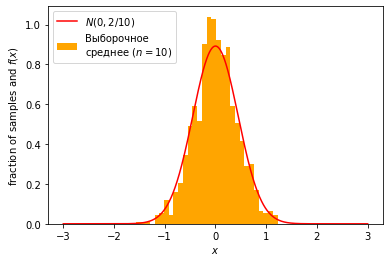

In [45]:
norm_2 = sts.norm(0, (0.2) ** (0.5))
arr_2 = np.linspace(-3, 3, 1000)
f_2 = norm_2.pdf(arr_2)
plt.plot(arr_2, f_2, label='$N(0, 2/10)$', color='red')
plt.hist(sample[1], density=True, bins=30, color='orange', label='Выборочное\nсреднее ($n = 10$)')
plt.legend(loc='upper left')
plt.ylabel('fraction of samples and $f(x)$')
plt.xlabel('$x$')
plt.show()

И, аналогчино, для $n\ =\ 50$:

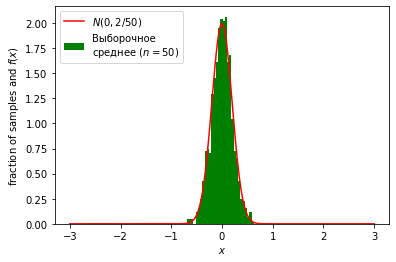

In [46]:
norm_3 = sts.norm(0, (0.04) ** (0.5))
arr_3 = np.linspace(-3, 3, 1000)
f_3 = norm_3.pdf(arr_3)
plt.plot(arr_3, f_3, label='$N(0, 2/50)$', color='red')
plt.hist(sample[2], density=True, bins=30, color='green', label='Выборочное\nсреднее ($n = 50$)')
plt.legend(loc='upper left')
plt.ylabel('fraction of samples and $f(x)$')
plt.xlabel('$x$')
plt.show()

Из приведенных выше графиков видно, что с увеличением $n$ точность аппроксимации увеличивается: сглаживается "пик" распределения Лапласса.

Таким образом, результаты работы получились следующие:
* На практике убедились, что ЦПТ работает для произвольных распределений: выборочное среднее произвольного распрделения аппроксимируется нормальным с нужными параметрами
* Узнали новое интересное распределение Лапласса
* Познакомились с некоторыми новыми возможностями библиотек ```numpy```, ```scipy``` и ```matplotlib```